# Comparison between Self-created KNN algo and Sklearn KNN classifier

### Scikit learn KNN algo

In [1]:
# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 8))
%matplotlib inline
plt.rc('figure', figsize=(10, 6))
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, cross_validation
import mglearn
import sklearn
import seaborn as sns
import graphviz

C:\Users\kbin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import random
import scipy.stats as ss

In [3]:
# Basic understanding regarding KNN: find the nearest neighbors
# distance between two points

def distance(p1,p2):
    return np.sqrt(np.sum(np.power(p2-p1, 2)))

p1 = np.array([1,1])
p2 = np.array([4,4])

distance(p1,p2)

4.242640687119285

In [4]:
# load breast cancer data

breast_cancer = sklearn.datasets.load_breast_cancer()

breast_cancer.keys()

In [6]:
# check columns
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
# transform bunch data to pd.DataFrame
bc_df = pd.DataFrame(breast_cancer['data'], columns=breast_cancer.feature_names)
bc_target_df = pd.Series(breast_cancer['target'])

In [8]:
# use cross_validation.train_test_split to create training sample and testing sample
X_train, X_test, y_train, y_test = cross_validation.train_test_split(bc_df, bc_target_df, test_size=0.2)

In [9]:
# basic check on training and testing samles
print('The shape of X_train is: {}'.format(X_train.shape))
print('The shape of X_test is: {}'.format(X_test.shape))
print('The shape of y_train is: {}'.format(y_train.shape))
print('The shape of y_test is: {}'.format(y_test.shape))

The shape of X_train is: (455, 30)
The shape of X_test is: (114, 30)
The shape of y_train is: (455,)
The shape of y_test is: (114,)


In [10]:
# create KNN model
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
# check accuracy
accuracy = clf.score(X_test, y_test)
accuracy

0.9473684210526315

### Creating our own KNN algorithms

In [12]:
# Euclidean Distance: the distance between two points

plot1 = [1,3]
plot2 = [2,5]
 
euclidean_distance = np.sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2)
print(euclidean_distance)

2.23606797749979


In [13]:
import warnings
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

In [14]:
# basic idea as to how we are going to create our algo
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

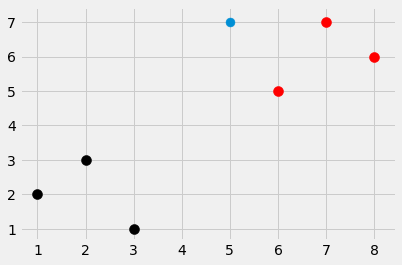

In [15]:
[[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=80)

In [16]:
# create KNN function
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups')
        
    distances = []
    
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
            
            
    votes = [i[1] for i in sorted(distances)[:k]]
    
    vote_result = Counter(votes).most_common(1)[0][0]
    
    return vote_result
    

In [17]:
# test on our little dataset
result = k_nearest_neighbors(dataset, new_features, k=3)

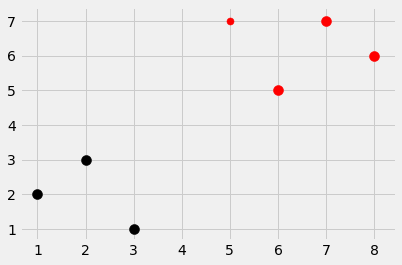

In [18]:
[[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=50, color=result)

### Try our algorithm in breast cancer dataset

In [19]:
import pandas as pd
import numpy as np
import random
from sklearn import datasets
from collections import Counter

In [133]:
# the KNN algorithm we created
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups')
        
    distances = []
    
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
            
            
    votes = [i[1] for i in sorted(distances)[:k]]
    
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    
    return vote_result, confidence

In [141]:
# import breast dataset

data = datasets.load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [22]:
# change the format of dataset

df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target_names'] = data['target']


In [145]:
# shuffle the data
# df = df.sample(frac=1)

# convert data values to list and shuffle the list
train_size = 0.9
df_list = df.values.tolist()
random.shuffle(df_list)


df_test = df_list[:int(len(df_list) * (1 - train_size))]
df_train = df_list[int(len(df_list) * (1 - train_size)):]


# transform our data to fit in our algorithm

train_set = {0:[],1:[]}
test_set = {0:[],1:[]}

# problem could be imbalance percentage of 1 and z
for i in df_train:
    train_set[i[-1]].append(i[:-1])
for i in df_test:
    test_set[i[-1]].append(i[:-1])

# percentage of cancer patients

print(len(train_set[1])/(len(train_set[0]) + len(train_set[1])))
print(len(test_set[1])/(len(test_set[0]) + len(test_set[1])))
       
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        else:
            print('wrong classification with confidence: ',confidence)
        total +=1
        
print('Accuracy:', correct/total)

0.6335282651072125
0.5714285714285714
wrong classification with confidence:  0.8
Accuracy: 0.9821428571428571


### test average accuracy of our own algo

In [176]:
# basic parameters:
train_size = 0.8
k = 30
no_test = 5

accuracies = []
for i in range(no_test):
    # convert data values to list and shuffle the list
    train_size = train_size
    df_list = df.values.tolist()
    random.shuffle(df_list)


    df_test = df_list[:int(len(df_list) * (1 - train_size))]
    df_train = df_list[int(len(df_list) * (1 - train_size)):]


    # transform our data to fit in our algorithm

    train_set = {0:[],1:[]}
    test_set = {0:[],1:[]}
    # problem could be imbalance percentage of 1 and z
    for i in df_train:
        train_set[i[-1]].append(i[:-1])
    for i in df_test:
        test_set[i[-1]].append(i[:-1])

    # percentage of cancer patients

#     print(len(train_set[1])/(len(train_set[0]) + len(train_set[1])))
#     print(len(test_set[1])/(len(test_set[0]) + len(test_set[1])))

    correct = 0
    total = 0

    for group in test_set:
        for data in test_set[group]:
            vote, confidence = k_nearest_neighbors(train_set, data, k=k)
            if group == vote:
                correct += 1
#             else:
#                 print('wrong classification with confidence: ',confidence)
            total +=1
    accuracies.append(correct/total)
    
for i, accuracy in enumerate(accuracies):
    print(str(i+1), ':',  accuracy)
print('The average accuracy is: ', np.mean(accuracies))
print('The max accuracy is: ', np.max(accuracies))
print('The min accuracy is: ', np.min(accuracies))

1 : 0.9380530973451328
2 : 0.9380530973451328
3 : 0.9026548672566371
4 : 0.9557522123893806
5 : 0.9203539823008849
The average accuracy is:  0.9309734513274336
The max accuracy is:  0.9557522123893806
The min accuracy is:  0.9026548672566371
